# Exam passing prediction

#### The are 3 subjects which are math, reading and writing. In this project, we are going to predict if a student could pass the exam(Total score is equal to or higher than 180 is considered pass) in terms of the given factors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


As we can see, there is not any missing values in the data set.

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# Quantify test preparation course

df.loc[df['test preparation course']=='completed', 'test preparation course'] = 1
df.loc[df['test preparation course']=='none', 'test preparation course'] = 0

In [7]:
# Quantify lunch type

df.loc[df['lunch']=='standard', 'lunch'] = 1
df.loc[df['lunch']=='free/reduced', 'lunch'] = 0

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,1,0,72,72,74
1,female,group C,some college,1,1,69,90,88
2,female,group B,master's degree,1,0,90,95,93
3,male,group A,associate's degree,0,0,47,57,44
4,male,group C,some college,1,0,76,78,75


In [9]:
# Unique values checking
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
# Quantify parental level of education
df.loc[df['parental level of education']=='some high school', 'parental level of education'] = 1
df.loc[df['parental level of education']=='high school', 'parental level of education'] = 2
df.loc[df['parental level of education']== "associate's degree", 'parental level of education'] = 3
df.loc[df['parental level of education']=='some college', 'parental level of education'] = 4
df.loc[df['parental level of education']=="bachelor's degree", 'parental level of education'] = 5
df.loc[df['parental level of education']=="master's degree", 'parental level of education'] = 6

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,5,1,0,72,72,74
1,female,group C,4,1,1,69,90,88
2,female,group B,6,1,0,90,95,93
3,male,group A,3,0,0,47,57,44
4,male,group C,4,1,0,76,78,75


In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

In [13]:
df.drop(columns=['math score', 'reading score', 'writing score'], axis=1,inplace=True)

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total score
0,female,group B,5,1,0,218
1,female,group C,4,1,1,247
2,female,group B,6,1,0,278
3,male,group A,3,0,0,148
4,male,group C,4,1,0,229


In [15]:
race = pd.get_dummies(df['race/ethnicity'],drop_first=True)

In [16]:
gender = pd.get_dummies(df['gender'],drop_first=True)

In [17]:
df = pd.concat([df,race,gender],axis=1)

In [18]:
df.drop(columns=['gender','race/ethnicity'],axis=1,inplace=True)

In [19]:
df.loc[df['total score'] >= 180, 'pass'] = 1
df.loc[df['total score'] < 180, 'pass'] = 0

In [20]:
df.head()

,parental level of education,lunch,test preparation course,total score,group B,group C,group D,group E,male,pass
0,5,1,0,218,1,0,0,0,0,1.0
1,4,1,1,247,0,1,0,0,0,1.0
2,6,1,0,278,1,0,0,0,0,1.0
3,3,0,0,148,0,0,0,0,1,0.0
4,4,1,0,229,0,1,0,0,1,1.0


In [21]:
df['pass'] = df['pass'].apply(np.int64)

In [22]:
df.head()

,parental level of education,lunch,test preparation course,total score,group B,group C,group D,group E,male,pass
0,5,1,0,218,1,0,0,0,0,1
1,4,1,1,247,0,1,0,0,0,1
2,6,1,0,278,1,0,0,0,0,1
3,3,0,0,148,0,0,0,0,1,0
4,4,1,0,229,0,1,0,0,1,1


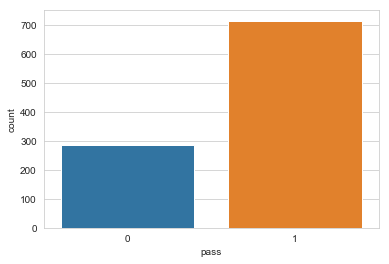

In [23]:
# Visualization

sns.set_style('whitegrid')
sns.countplot(x='pass',data=df)

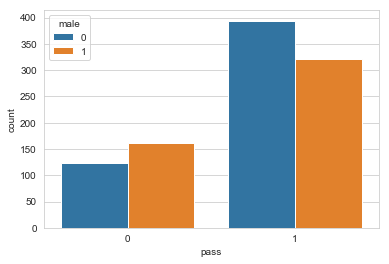

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='pass',hue='male',data=df)

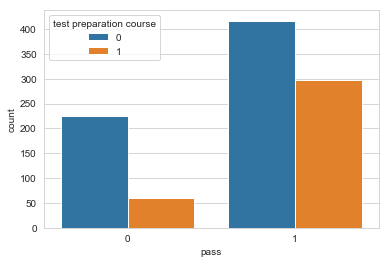

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='pass',hue='test preparation course',data=df)

In [40]:
# Train Test Split
# Logistic Regression
from sklearn.model_selection import train_test_split

In [41]:
y = df['pass']
X = df.drop(['total score','pass'],axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
predictions = lgmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 24  70]
 [ 14 192]]


             precision    recall  f1-score   support

          0       0.63      0.26      0.36        94
          1       0.73      0.93      0.82       206

avg / total       0.70      0.72      0.68       300



In [48]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [49]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

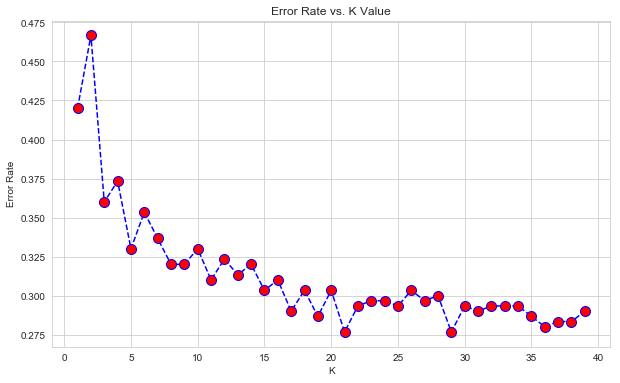

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 33  61]
 [ 65 141]]


             precision    recall  f1-score   support

          0       0.34      0.35      0.34        94
          1       0.70      0.68      0.69       206

avg / total       0.58      0.58      0.58       300



In [52]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[ 19  75]
 [  8 198]]


             precision    recall  f1-score   support

          0       0.70      0.20      0.31        94
          1       0.73      0.96      0.83       206

avg / total       0.72      0.72      0.67       300



In [54]:
# SVM

from sklearn.svm import SVC

In [55]:
model = SVC()

In [56]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
pred_svm = model.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(confusion_matrix(y_test,pred_svm))
print('\n')
print(classification_report(y_test,pred_svm))

[[ 15  79]
 [  5 201]]


             precision    recall  f1-score   support

          0       0.75      0.16      0.26        94
          1       0.72      0.98      0.83       206

avg / total       0.73      0.72      0.65       300



In [60]:
from sklearn.grid_search import GridSearchCV

In [61]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [62]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [63]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.726496 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.726496 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.728448 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.726496 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.726496 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.728448 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.726496 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.728448 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.726496 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.726496 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.728448 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.726496 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.726496 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [64]:
grid.best_params_

{'C': 1000, 'gamma': 0.01}

In [65]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
grid_predictions = grid.predict(X_test)

In [67]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 33  61]
 [ 30 176]]


             precision    recall  f1-score   support

          0       0.52      0.35      0.42        94
          1       0.74      0.85      0.79       206

avg / total       0.67      0.70      0.68       300



In [68]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [69]:
dtree = DecisionTreeClassifier()

In [70]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
dtree_pred = dtree.predict(X_test)

In [73]:
print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[ 37  57]
 [ 55 151]]


             precision    recall  f1-score   support

          0       0.40      0.39      0.40        94
          1       0.73      0.73      0.73       206

avg / total       0.62      0.63      0.63       300



In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc = RandomForestClassifier(n_estimators=200)

In [76]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
rfc_pred = rfc.predict(X_test)

In [78]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[ 31  63]
 [ 37 169]]


             precision    recall  f1-score   support

          0       0.46      0.33      0.38        94
          1       0.73      0.82      0.77       206

avg / total       0.64      0.67      0.65       300

